In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [35]:
# 2. Đọc file csv
df = pd.read_csv('../Dataset/TSLA_data.csv')

In [36]:
df['Date'] = pd.to_datetime(df['Date'])
df1=df.reset_index()['Close']
df
     

,Date,Close,High,Low,Open,Volume,Change %
0,2018-01-02,21.368668,21.474001,20.733334,20.799999,65283000,0.028846
1,2018-01-03,21.150000,21.683332,21.036667,21.400000,67822500,-0.025327
2,2018-01-04,20.974667,21.236668,20.378668,20.858000,149194500,0.011986
3,2018-01-05,21.105333,21.149332,20.799999,21.108000,68868000,-0.001958
4,2018-01-08,22.427334,22.468000,21.033333,21.066668,147891000,0.060633
...,...,...,...,...,...,...,...
1830,2025-04-14,252.350006,261.799988,245.929993,258.359985,100135200,-0.032706
1831,2025-04-15,254.110001,258.750000,247.539993,249.910004,79594300,-0.009203
1832,2025-04-16,241.550003,251.970001,233.889999,247.610001,112378700,-0.016720
1833,2025-04-17,241.369995,244.339996,237.679993,243.470001,83404800,-0.054257


In [37]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [38]:
# 4. Chia train test
train_size = int(0.8 * len(df1))
test_size = int(len(df1)) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [39]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [40]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

# time_step = 100
# X_train, y_train = create_dataset(train_data, time_step)
# X_test, ytest = create_dataset(test_data, time_step)
time_step = 100

x, y = create_dataset(df1, time_step)

X_train = x[:train_size-100]
X_test = x[train_size-100:]
y_train = y[:train_size-100]
ytest = y[train_size-100:]

In [41]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [42]:
# 8. Define GRU Model
from keras.models import Sequential
from keras.layers import Input, GRU, Dense

model = Sequential()
model.add(Input(shape=(time_step, 1)))
model.add(GRU(64))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [43]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.1126 - val_loss: 0.0062
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0131 - val_loss: 0.0028
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 7.3069e-04 - val_loss: 0.0013
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 6.1569e-04 - val_loss: 0.0012
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 5.4869e-04 - val_loss: 0.0012
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 5.4524e-04 - val_loss: 0.0011
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 5.6090e-04 - val_loss: 0.0011
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 4.9428e-04 - val_loss: 0.0010
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 5.3122e-04 - val_loss: 0.0010
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 4.8374e-04 - val_loss: 0.0010
Epoch 12/100
22/22 ━

In [44]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [45]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

In [46]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 257.8282965307322


In [47]:
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_pred, ytest)
test_mape = np.mean(np.abs(y_pred - ytest)/np.abs(y_pred))*100
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Testing MAPE: 99.78007715044643
Testing MAE: 247.23502698153


In [48]:
x_input = test_data[len(test_data)-time_step:].reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output = []
n_steps = 100
i = 0
while(i < 90):

    if(len(temp_input) > 100):
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i = i + 1

print(lst_output)

[[0.46555382013320923], [0.4612005949020386], [0.45849329233169556], [0.4561134874820709], [0.45391619205474854], [0.4518691897392273], [0.44995564222335815], [0.448162317276001], [0.44647926092147827], [0.4448976516723633], [0.4434106945991516], [0.4420112073421478], [0.44069376587867737], [0.43945327401161194], [0.4382844567298889], [0.4371832609176636], [0.4361461102962494], [0.43516936898231506], [0.4342494308948517], [0.4333830773830414], [0.43256688117980957], [0.4317980706691742], [0.4310744106769562], [0.43039342761039734], [0.42975255846977234], [0.4291497766971588], [0.4285825490951538], [0.42804887890815735], [0.4275470972061157], [0.4270755350589752], [0.4266321063041687], [0.42621535062789917], [0.425823837518692], [0.42545607686042786], [0.4251105785369873], [0.4247862696647644], [0.42448174953460693], [0.4241960644721985], [0.4239281415939331], [0.4236767888069153], [0.42344117164611816], [0.42322036623954773], [0.4230135381221771], [0.42281991243362427], [0.422638565301

In [49]:
future_predict = scaler.inverse_transform(np.array(lst_output).reshape(-1, 1))
future_predict

array([[229.77730446],
       [227.74030564],
       [226.47348119],
       [225.35990232],
       [224.33172483],
       [223.37387379],
       [222.47847008],
       [221.63932195],
       [220.85177166],
       [220.11169138],
       [219.41590156],
       [218.76104137],
       [218.14457276],
       [217.56411107],
       [217.01718798],
       [216.5019069 ],
       [216.01659441],
       [215.55954916],
       [215.12908377],
       [214.72369214],
       [214.34177055],
       [213.98202208],
       [213.64340084],
       [213.32474935],
       [213.02486832],
       [212.74280945],
       [212.47738741],
       [212.22766783],
       [211.9928698 ],
       [211.77221236],
       [211.56471934],
       [211.36970742],
       [211.18650721],
       [211.01442147],
       [210.8527529 ],
       [210.70099949],
       [210.55850579],
       [210.42482557],
       [210.29945677],
       [210.1818416 ],
       [210.07158958],
       [209.96826841],
       [209.8714876 ],
       [209

In [50]:
# Append the last 100 values of test_data to the beginning of y_pred
last_100_test_data = scaler.inverse_transform(test_data[:101])
y_pred_with_test_data = np.append(last_100_test_data, y_pred)

In [51]:
print(y_pred_with_test_data.shape)
test_data.shape

(467,)


(367, 1)

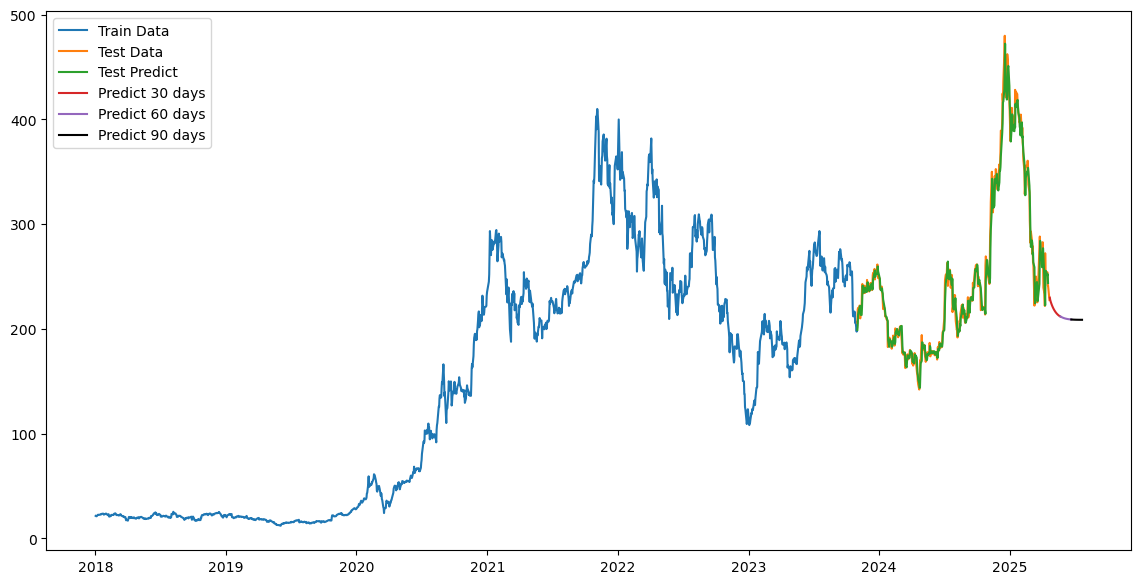

In [52]:
# Plot results
plt.figure(figsize=(14, 7))

# Plot train data
plt.plot(df['Date'][:train_size], scaler.inverse_transform(train_data), label='Train Data')

# Plot test data
plt.plot(df['Date'][train_size:], scaler.inverse_transform(test_data), label='Test Data')

# Plot test predict data with appended last 100 test data
plt.plot(df['Date'][train_size:train_size + len(y_pred)], y_pred, label='Test Predict')

# Plot future predictions
last_test_date = df['Date'].iloc[-1]
future_predict_dates = pd.date_range(start=last_test_date + pd.Timedelta(days=1), periods=30)
future_predict_dates_1 = pd.date_range(start=last_test_date + pd.Timedelta(days=31), periods=31)
future_predict_dates_2 = pd.date_range(start=last_test_date + pd.Timedelta(days=61), periods=31)

plt.plot(future_predict_dates, future_predict[0:30], label='Predict 30 days')
plt.plot(future_predict_dates_1, future_predict[29:60], label='Predict 60 days')
plt.plot(future_predict_dates_2, future_predict[59:90], label='Predict 90 days', color='black')
# Display the legend
plt.legend()

# Display the plot
plt.show()